In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from random import shuffle

In [62]:
train=pd.read_csv("/content/train (2).csv")

In [63]:
test=pd.read_csv("/content/eval.csv")

In [64]:
train.head(5)

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [65]:
test.head(5)

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,0,male,54.0,0,0,51.8625,First,E,Southampton,y
2,1,female,58.0,0,0,26.5500,First,C,Southampton,y
3,1,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,1,male,34.0,0,0,13.0000,Second,D,Southampton,y


In [66]:
y_train=train.pop("survived")

In [67]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
622    0
623    0
624    1
625    0
626    0
Name: survived, Length: 627, dtype: int64

In [68]:
y_test=test.pop("survived")

In [69]:
y_test

0      0
1      0
2      1
3      1
4      1
      ..
259    1
260    0
261    0
262    0
263    1
Name: survived, Length: 264, dtype: int64

In [70]:
train.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 627 non-null    object 
 1   age                 627 non-null    float64
 2   n_siblings_spouses  627 non-null    int64  
 3   parch               627 non-null    int64  
 4   fare                627 non-null    float64
 5   class               627 non-null    object 
 6   deck                627 non-null    object 
 7   embark_town         627 non-null    object 
 8   alone               627 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 44.2+ KB


In [72]:
train.isnull().sum()

sex                   0
age                   0
n_siblings_spouses    0
parch                 0
fare                  0
class                 0
deck                  0
embark_town           0
alone                 0
dtype: int64

In [73]:
train.shape

(627, 9)

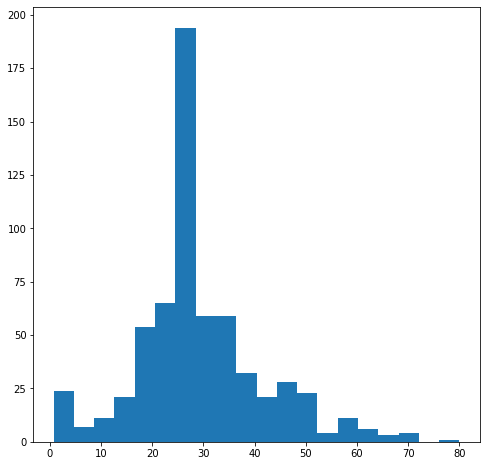

In [74]:
plt.figure(figsize=(8,8))
plt.hist(train["age"],bins=20)
plt.show()

# matplotlib barh

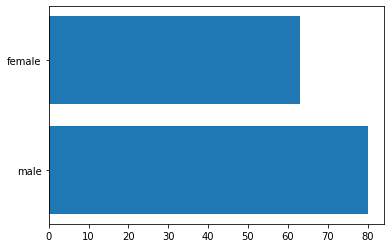

In [75]:
x=train["sex"]
y=train["age"]
plt.barh(x,y)
plt.show()

# pandas.DataFrame.plot.barh

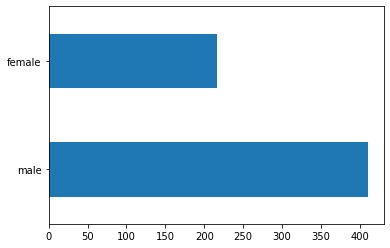

In [76]:
train.sex.value_counts().plot.barh()
plt.show()

In [77]:
x=pd.concat([train,y_train],axis=1).groupby("sex").survived.mean()

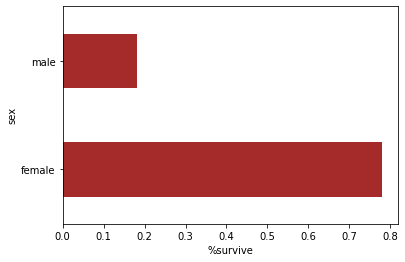

In [78]:
x.plot(kind="barh",color="brown").set_xlabel("%survive")
plt.show()

In [79]:
train.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [80]:
numeric_column=["age","fare"]
categorical_column=["sex","n_siblings_spouses","parch","class","deck","embark_town","alone"]

In [81]:
feature_columns=[]
for feature_name in categorical_column:
  vocabulary=train[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name,vocabulary))

for feature_name in numeric_column:
  feature_columns.append(tf.feature_column.numeric_column(feature_name,dtype=tf.float32))

In [82]:
print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [83]:
def make_input_function(data_df,label_data,num_epochs=10,batch_size=32):
  def input_function():
    ds=tf.data.Dataset.from_tensor_slices((dict(data_df),label_data))
    if shuffle:
      ds=ds.shuffle(1000)
    ds=ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function
train_input_function=make_input_function(train,y_train)
test_input_function=make_input_function(test,y_test,num_epochs=1)

linear_est=tf.estimator.LinearClassifier(feature_columns=feature_columns)

In [84]:
linear_est.train(train_input_function)


In [85]:
result=linear_est.evaluate(test_input_function)

In [86]:
print(result)

{'accuracy': 0.75757575, 'accuracy_baseline': 0.625, 'auc': 0.83021116, 'auc_precision_recall': 0.79563415, 'average_loss': 0.47467658, 'label/mean': 0.375, 'loss': 0.4927257, 'precision': 0.68817204, 'prediction/mean': 0.3871271, 'recall': 0.64646465, 'global_step': 200}


In [87]:
print(result["accuracy"])

0.75757575


In [88]:
result=list(linear_est.predict(test_input_function))

In [89]:
print(result)

[{'logits': array([-1.236799], dtype=float32), 'logistic': array([0.22499365], dtype=float32), 'probabilities': array([0.7750063 , 0.22499365], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([0.82709056], dtype=float32), 'logistic': array([0.6957394], dtype=float32), 'probabilities': array([0.3042606, 0.6957394], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([1.4146698], dtype=float32), 'logistic': array([0.8045014], dtype=float32), 'probabilities': array([0.19549857, 0.8045015 ], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([-2.0202005], dtype=float

In [90]:
print(test.loc[5])
print(y_test.loc[5])
print(result[5]["probabilities"][1])

sex                       female
age                         15.0
n_siblings_spouses             0
parch                          0
fare                      8.0292
class                      Third
deck                     unknown
embark_town           Queenstown
alone                          y
Name: 5, dtype: object
1
0.7544544
